# Import Overlay
导入Overlay

In [1]:
#部署Overlay和dma
import pynq.lib.dma
import numpy as np
from pynq import Overlay
hmol = Overlay("../overlay/huffman.bit")
dma0 = hmol.axi_dma_0
dma1 = hmol.axi_dma_1
print("Overlay ok")

Overlay ok


![Diagram](./data/huffmambd.png)
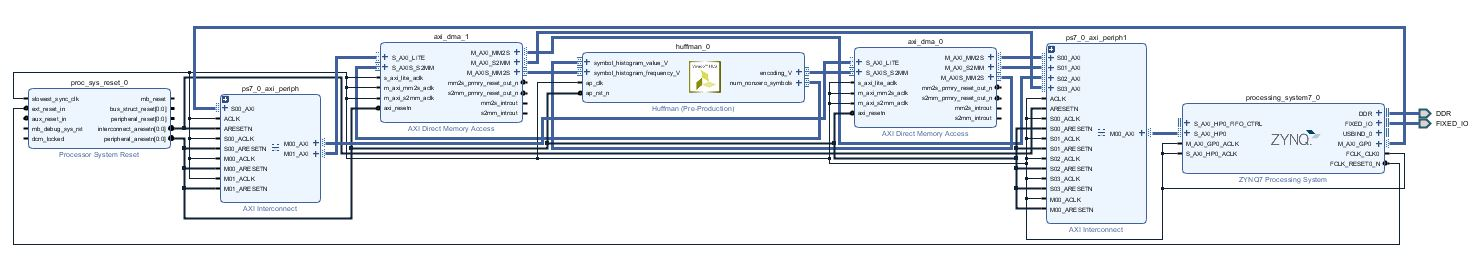

![AddressMap](./data/AddressMap.png)
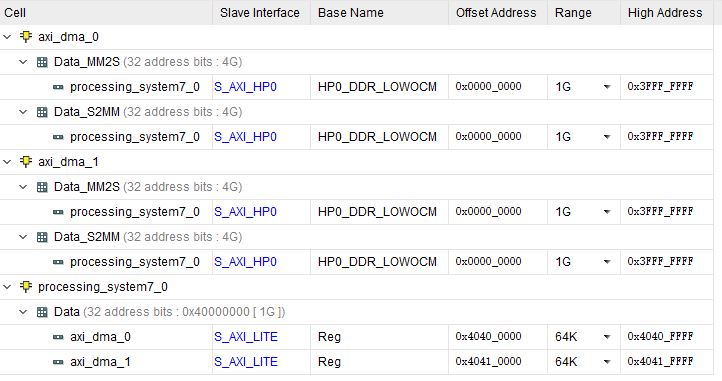

# Canonical hoffman codes as follows:
Canonical霍夫曼编码如下：

![HuffmanFlow](./data/canonical_huffman_flow.jpg)

In [42]:
#生成输入数据,并输出结果
data = []
frequency = np.zeros(256, dtype = np.uint32)
with open("./data/huffman256.txt") as f:
    for line in f:
        data.append(line.split("\n"))

for i in range(256):
    frequency[i] = int(data[i][0],16)

from pynq import allocate
inputvalue = allocate(shape=(256,), dtype=np.uint16)
inputfrequency = allocate(shape=(256,), dtype=np.uint32)
encoding_v = allocate(shape=(256,), dtype=np.uint32)
num_nonzero_symbol = allocate(shape=(1,), dtype=np.int)

for i in range(256):
    inputvalue[i] = i
    inputfrequency[i] = frequency[i]

dma0.sendchannel.transfer(inputvalue)
dma1.sendchannel.transfer(inputfrequency)
dma0.recvchannel.transfer(encoding_v)
dma1.recvchannel.transfer(num_nonzero_symbol)


In [43]:
#将encode后的码字结果print到文本文件
encoding = np.zeros(256, dtype = np.uint32)
for i in range(256):
    encoding[i] = encoding_v[i]
    
with open("./data/huffman256_out.txt","w") as fo:
    for i in range(256):
        print(i,format(encoding[i],'x'),sep=', ',file=fo)
    fo.close()

In [46]:
# 对比结果，将不同的结果print到文本文件，并显示结果

# huffman256_out.txt    为huffman encode后的码字结果
# huffman256_golden.txt 为参考书给予的黄金参考码字结果
# diff.txt 为存储不同内容文件

print ("\n***************Comparing against output data*************** \n\n")

f1 = open("./data/huffman256_out.txt","r")
f2 = open("./data/huffman256_golden.txt","r")
return_val = 0;

txt1 = f1.read()
txt2 = f2.read()
f1.close()
f2.close()

line1 = txt1.split("\n")
line2 = txt2.split("\n")

outfile = open("./data/huffman256_diff.txt", "w")

for i in line1:
    if i not in line2:
        print(i,file=outfile)
        return_val = return_val + 1

if return_val != 0:
    print("Above content in out. But not in golden.",file=outfile)
    print("*******************************************\n")
    print(" FAIL: Output DOES NOT match the golden output\n")
    print(" Number of Incorrect codeword :",return_val,"\n")
    print(" Accuracy of the codeword :",(1-return_val/256)*100,"%\n")
    print(" Incorrect codeword has been printed in huffman256_diff.txt \n")
    print("*******************************************\n")
else :
    print("PASS!!! The output matches the golden output",file=outfile)
    print("*******************************************\n")
    print(" PASS: The output matches the golden output\n")
    print(" Number of Incorrect codeword :",return_val,"\n")
    print(" Accuracy of the codeword :",(1-return_val/256)*100,"%\n")
    print("*******************************************\n")
   
outfile.close()

print ("\n*********Ending canonical Huffman encoding testbench********\n\n")


***************Comparing against output data*************** 


*******************************************

 PASS: The output matches the golden output

 Number of Incorrect codeword : 0 

 Accuracy of the codeword : 100.0 %

*******************************************


*********Ending canonical Huffman encoding testbench********


